In [1]:
library(data.table)
matrix_destination = "matrix.cellQC.geneQC.normalised.rds"
source("load_matrix.R")

Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsp

## What types of genes are in our (now normalised) data set?

More importantly:

#### Do we have any control genes (ERCC or Mitochondrial)?

Genes with known or constant expression within cells provide a useful background baseline to measure DE against.

Let us investigate by probing the gene names and their descriptions from our annotated set

In [2]:
#for (descriptor in names(rowData(sce))){
#    desc <- toString(descriptor)
#    cat(descriptor)
#    cat("\n")
#    print(rownames(sce[grepl("mt", rowData(sce)$desc),]))
#}
infoTable <- function(names)
{
    tableau <- list()
    
    for (name in names){
        #print(c(
        #    rowData(sce[rownames(sce) %in% name,])$external_transcript_name[[1]],
        #    rowData(sce[rownames(sce) %in% name,])$description[[1]]
        #))

        tableau <- rbind(tableau, c(
            rowData(sce[rownames(sce) %in% name,])$external_transcript_name[[1]],
            rowData(sce[rownames(sce) %in% name,])$description[[1]]
        ))
    }
    
    if (length(tableau) > 0){    
        colnames(tableau) <- c("Gene Name", "Description")
    }
    return(tableau)
}

searcher <- function(terms, appender = NULL){
    
    results <- list()
    
    for (term in terms){
        matcher <- paste("(^|\\s)", term, appender, sep="")
        results <- rbind(
            results,
            infoTable(rownames(sce[grepl(matcher, rowData(sce)$"external_transcript_name"),])),
            infoTable(rownames(sce[grepl(matcher, rowData(sce)$"description"),]))
        )
    }
    return(results)
}

#tab <- searcher(c("mt", "mitochondrially encoded", "ercc","ERCC", "control", "Control"))
tab <- searcher(c("mitochondrially encoded", "ercc","ERC", "Erc"))
tab

Gene Name  
 [1,] mt-Rnr1-201
 [2,] mt-Rnr2-201
 [3,] mt-Tl1-201 
 [4,] mt-Nd1-201 
 [5,] mt-Tq-201  
 [6,] mt-Tm-201  
 [7,] mt-Nd2-201 
 [8,] mt-Tn-201  
 [9,] mt-Tc-201  
[10,] mt-Ty-201  
[11,] mt-Co1-201 
[12,] mt-Ts1-201 
[13,] mt-Nd4-201 
[14,] mt-Nd5-201 
[15,] mt-Nd6-201 
[16,] mt-Te-201  
[17,] mt-Cytb-201
[18,] mt-Tp-201  
[19,] Ercc6l2-202
[20,] Ercc8-205  
[21,] Ercc3-201  
[22,] Ercc5-207  
[23,] Erc1-203   
[24,] Ercc6l-201 
      Description                                                                                                                     
 [1,] mitochondrially encoded 12S rRNA [Source:MGI Symbol;Acc:MGI:102493]                                                             
 [2,] mitochondrially encoded 16S rRNA [Source:MGI Symbol;Acc:MGI:102492]                                                             
 [3,] mitochondrially encoded tRNA leucine 1 [Source:MGI Symbol;Acc:MGI:102482]                                                       
 [4,] mitochondrially encoded NADH dehydrogenase 1 [Source:MGI Symbol;Acc:MGI:101787]                                                 
 [5,] mitochondrially encoded tRNA glutamine [Source:MGI Symbol;Acc:MGI:102477]                                                       
 [6,] mitochondrially encoded tRNA methionine [Source:MGI Symbol;Acc:MGI:102480]                                                      
 [7,] mitochondrially encoded NADH dehydrogenase 2 [Source:MGI Symbol;Acc:MGI:102500]                                                 
 [8,] mitochondrially encoded tRNA asparagine [Source:MGI Symbol;Acc:MGI:102479]                                                      
 [9,] mitochondrially encoded tRNA cysteine [Source:MGI Symbol;Acc:MGI:102490]                                                        
[10,] mitochondrially encoded tRNA tyrosine [Source:MGI Symbol;Acc:MGI:102470]                                                        
[11,] mitochondrially encoded cytochrome c oxidase I [Source:MGI Symbol;Acc:MGI:102504]                                               
[12,] mitochondrially encoded tRNA serine 1 [Source:MGI Symbol;Acc:MGI:102475]                                                        
[13,] mitochondrially encoded NADH dehydrogenase 4 [Source:MGI Symbol;Acc:MGI:102498]                                                 
[14,] mitochondrially encoded NADH dehydrogenase 5 [Source:MGI Symbol;Acc:MGI:102496]                                                 
[15,] mitochondrially encoded NADH dehydrogenase 6 [Source:MGI Symbol;Acc:MGI:102495]                                                 
[16,] mitochondrially encoded tRNA glutamic acid [Source:MGI Symbol;Acc:MGI:102488]                                                   
[17,] mitochondrially encoded cytochrome b [Source:MGI Symbol;Acc:MGI:102501]                                                         
[18,] mitochondrially encoded tRNA proline [Source:MGI Symbol;Acc:MGI:102478]                                                         
[19,] excision repair cross-complementing rodent repair deficiency, complementation group 6 like 2 [Source:MGI Symbol;Acc:MGI:1923501]
[20,] excision repaiross-complementing rodent repair deficiency, complementation group 8 [Source:MGI Symbol;Acc:MGI:1919241]          
[21,] excision repair cross-complementing rodent repair deficiency, complementation group 3 [Source:MGI Symbol;Acc:MGI:95414]         
[22,] excision repair cross-complementing rodent repair deficiency, complementation group 5 [Source:MGI Symbol;Acc:MGI:103582]        
[23,] ELKS/RAB6-interacting/CAST family member 1 [Source:MGI Symbol;Acc:MGI:2151013]                                                  
[24,] excision repair cross-complementing rodent repair deficiency complementation group 6 like [Source:MGI Symbol;Acc:MGI:2654144]

As we can see, we have 18 genes related to mitochondrial features and 6 genes that appear to be ERCC controls, but on closer inspection are just (badly named) genes not related to control sets.

MT-related genes are sometimes used as control sets, but it depends entirely on the analysis and so we should not select them as controls without knowing for sure.

### Do we at least have some housekeeping genes?

We need some actual housekeeping genes that have constant expression levels that we can use to better quantify gene expression

** What does the literature say?**

 * "Housekeeping and tissue-specific genes in mouse tissues" [2007](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1888706/)
  * 1111 genes were found present in the 15 tissues tested, of which 280 of these genes were constantly expressed.
  

 * "Selection of Stable Reference Genes for Quantitative RT-PCR Comparisons of Mouse Embryonic and Extra-Embryonic Stem Cells" [2011](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0027592)
  * 14 genes tested across embryonic, trophectoderm, and extraembryonic endodermic cells. These 14 are normally used as controls:
   * *Actb, B2m, Gapdh, Gusb, Hk2, Hprt, Hsp70, H2afz, Pgk1, Ppia, Rn7sk, Sdha, Tbp, Ywhaz*
   * *Pgk1, Sdha* and *Tbp* most stable across all three. 
   * *Sdha, Tbp* and *Ywhaz* most stable in between embryonic and trophectodermic cells.
   
It seems as if the 2011 paper is most relevant to our data.


**Test if the embyronic/trop/extra genes exist in our data:**


In [3]:
cand = c("Actb", "B2m", "Gapdh", "Gusb", "Hk2", "Hprt", "Hsp70", "H2afz", "Pgk1", "Ppia", "Rn7sk", "Sdha", "Tbp", "Ywhaz")
best = c("Pgk1", "Sdha","Tbp", "Ywhaz")

tab2 <- searcher(cand,"-")
tab2

Gene Name
 [1,] Actb-201 
 [2,] B2m-201  
 [3,] Gapdh-213
 [4,] Gusb-201 
 [5,] Hk2-201  
 [6,] Hprt-201 
 [7,] H2afz-201
 [8,] Pgk1-201 
 [9,] Ppia-202 
[10,] Sdha-201 
[11,] Tbp-210  
[12,] Ywhaz-201
      Description                                                                                                                
 [1,] actin, beta [Source:MGI Symbol;Acc:MGI:87904]                                                                              
 [2,] beta-2 microglobulin [Source:MGI Symbol;Acc:MGI:88127]                                                                     
 [3,] glyceraldehyde-3-phosphate dehydrogenase [Source:MGI Symbol;Acc:MGI:95640]                                                 
 [4,] glucuronidase, beta [Source:MGI Symbol;Acc:MGI:95872]                                                                      
 [5,] hexokinase 2 [Source:MGI Symbol;Acc:MGI:1315197]                                                                           
 [6,] hypoxanthine guanine phosphoribosyl transferase [Source:MGI Symbol;Acc:MGI:96217]                                          
 [7,] H2A histone family, member Z [Source:MGI Symbol;Acc:MGI:1888388]                                                           
 [8,] phosphoglycerate kinase 1 [Source:MGI Symbol;Acc:MGI:97555]                                                                
 [9,] peptidylprolyl isomerase A [Source:MGI Symbol;Acc:MGI:97749]                                                               
[10,] succinate dehydrogenase complex, subunit A, flavoprotein (Fp) [Source:MGI Symbol;Acc:MGI:1914195]                          
[11,] TATA box binding protein [Source:MGI Symbol;Acc:MGI:101838]                                                                
[12,] tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein, zeta polypeptide [Source:MGI Symbol;Acc:MGI:109484]

12 of our 14 control candidates were detected (missing: Hsp70 and Rn7sk), and so we shall assign these 12 as our controls

In [4]:
# Define Mitochondrial genes as controls
#isSpike(sce, "MT") <- rownames(sce[grepl("^mt-", rownames(sce)),])
isSpike(sce, "HK") <- unlist(tab2[,1])

sce <- calculateQCMetrics(
    sce,
    feature_controls = list(
        HK = isSpike(sce)
    )
)


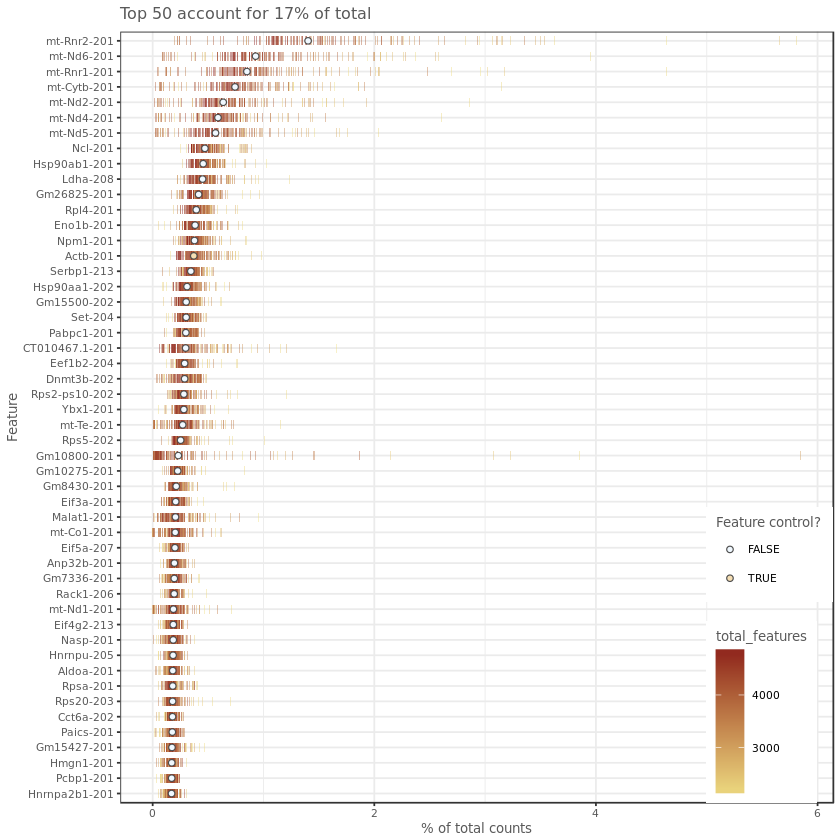

In [6]:
res <- ggplot_build(plotQC(sce, type = "high"))
res$plot

Only 1 (Actb) of our control genes appears in the top 50 most differentially expressed. Our most DE genes appear to be mitochondrially related.

Let us examine whether the other genes of the 50 most DE are of interest to us:

In [7]:
names = unique(res$plot$data$Tags)
infoTable(names)

Gene Name     
 [1,] mt-Rnr2-201   
 [2,] mt-Nd6-201    
 [3,] mt-Rnr1-201   
 [4,] mt-Cytb-201   
 [5,] mt-Nd2-201    
 [6,] mt-Nd4-201    
 [7,] mt-Nd5-201    
 [8,] Ncl-201       
 [9,] Hsp90ab1-201  
[10,] Ldha-208      
[11,] Gm26825-201   
[12,] Rpl4-201      
[13,] Eno1b-201     
[14,] Npm1-201      
[15,] Actb-201      
[16,] Serbp1-213    
[17,] Hsp90aa1-202  
[18,] Gm15500-202   
[19,] Set-204       
[20,] Pabpc1-201    
[21,] CT010467.1-201
[22,] Eef1b2-204    
[23,] Dnmt3b-202    
[24,] Rps2-ps10-202 
[25,] Ybx1-201      
[26,] mt-Te-201     
[27,] Rps5-202      
[28,] Gm10800-201   
[29,] Gm10275-201   
[30,] Gm8430-201    
[31,] Eif3a-201     
[32,] Malat1-201    
[33,] mt-Co1-201    
[34,] Eif5a-207     
[35,] Anp32b-201    
[36,] Gm7336-201    
[37,] Rack1-206     
[38,] mt-Nd1-201    
[39,] Eif4g2-213    
[40,] Nasp-201      
[41,] Hnrnpu-205    
[42,] Aldoa-201     
[43,] Rpsa-201      
[44,] Rps20-203     
[45,] Cct6a-202     
[46,] Paics-201     
[47,] Gm15427-201   
[48,] Hmgn1-201     
[49,] Pcbp1-201     
[50,] Hnrnpa2b1-201 
      Description                                                                                                                                          
 [1,] mitochondrially encoded 16S rRNA [Source:MGI Symbol;Acc:MGI:102492]                                                                                  
 [2,] mitochondrially encoded NADH dehydrogenase 6 [Source:MGI Symbol;Acc:MGI:102495]                                                                      
 [3,] mitochondrially encoded 12S rRNA [Source:MGI Symbol;Acc:MGI:102493]                                                                                  
 [4,] mitochondrially encoded cytochrome b [Source:MGI Symbol;Acc:MGI:102501]                                                                              
 [5,] mitochondrially encoded NADH dehydrogenase 2 [Source:MGI Symbol;Acc:MGI:102500]                                                                      
 [6,] mitochondrially encoded NADH dehydrogenase 4 [Source:MGI Symbol;Acc:MGI:102498]                                                                      
 [7,] mitochondrially encoded NADH dehydrogenase 5 [Source:MGI Symbol;Acc:MGI:102496]                                                                      
 [8,] nucleolin [Source:MGI Symbol;Acc:MGI:97286]                                                                                                          
 [9,] heat shock protein 90 alpha (cytosolic), class B member 1 [Source:MGI Symbol;Acc:MGI:96247]                                                          
[10,] lactate dehydrogenase A [Source:MGI Symbol;Acc:MGI:96759]                                                                                            
[11,] predicted gene, 26825 [Source:MGI Symbol;Acc:MGI:5477319]                                                                                            
[12,] ribosomal protein L4 [Source:MGI Symbol;Acc:MGI:1915141]                                                                                             
[13,] enolase 1B, retrotransposed [Source:MGI Symbol;Acc:MGI:3648653]                                                                                      
[14,] nucleophosmin 1 [Source:MGI Symbol;Acc:MGI:106184]                                                                                                   
[15,] actin, beta [Source:MGI Symbol;Acc:MGI:87904]                                                                                                        
[16,] serpine1 mRNA binding protein 1 [Source:MGI Symbol;Acc:MGI:1914120]                                                                                  
[17,] heat shock protein 90, alpha (cytosolic), class A member 1 [Source:MGI Symbol;Acc:MGI:96250]                                                         
[18,] predicted pseudogene 15500 [Source:MGI Symbol;Acc:MGI:3782947]                                                           

*(I am not too familiar with the gene environment here, so I will likely postpone this type of analysis or discuss it more with Björn or Sebastien)*

In [8]:
#sum(rowData(sce)$is_feature_control)
saveRDS(sce, "matrix.cellQC.geneQC.normalised.hk_controls.rds")